In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras import regularizers

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, ty, 'r', label="Train Loss")
    ax.plot(x, vy, 'b', label="Validation Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#**Model -I with 2 - Convnet layers**

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 344us/step - loss: 1.6334 - acc: 0.4473 - val_loss: 1.0381 - val_acc: 0.7450
Epoch 2/12
60000/60000 [==============================] - 18s 293us/step - loss: 1.1997 - acc: 0.5956 - val_loss: 0.8789 - val_acc: 0.7756
Epoch 3/12
60000/60000 [==============================] - 18s 292us/step - loss: 1.1173 - acc: 0.6253 - val_loss: 0.7978 - val_acc: 0.7936
Epoch 4/12
60000/60000 [==============================] - 18s 297us/step - loss: 1.0810 - acc: 0.6407 - val_loss: 0.7912 - val_acc: 0.7843
Epoch 5/12
60000/60000 [==============================] - 18s 296us/step - loss: 1.0553 - acc: 0.6488 - val_loss: 0.6906 - val_acc: 0.8256
Epoch 6/12
60000/60000 [==============================] - 18s 292us/step - loss: 1.0407 - acc: 0.6530 - val_loss: 0.7503 - val_acc: 0.7938
Epoch 7/12
60000/60000 [==============================] - 18s 295us/step - loss: 1.0214 - acc: 0.6609 - val_loss: 0.

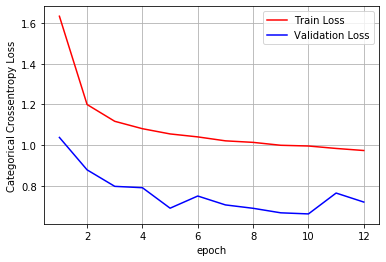

CPU times: user 5min 22s, sys: 25.6 s, total: 5min 48s
Wall time: 3min 37s


In [0]:
%%time
model = Sequential()
model.add(Conv2D(1, kernel_size=(2, 2), activation='relu', 
                 input_shape=input_shape, padding='same', 
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(7, (2, 2), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Error plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 336us/step - loss: 1.9122 - acc: 0.3738 - val_loss: 1.0775 - val_acc: 0.7722
Epoch 2/12
60000/60000 [==============================] - 17s 282us/step - loss: 1.4165 - acc: 0.5462 - val_loss: 0.8782 - val_acc: 0.8191
Epoch 3/12
60000/60000 [==============================] - 17s 287us/step - loss: 1.2831 - acc: 0.5912 - val_loss: 0.8111 - val_acc: 0.8334
Epoch 4/12
60000/60000 [==============================] - 17s 287us/step - loss: 1.2130 - acc: 0.6127 - val_loss: 0.7616 - val_acc: 0.8515
Epoch 5/12
60000/60000 [==============================] - 17s 289us/step - loss: 1.1369 - acc: 0.6423 - val_loss: 0.7158 - val_acc: 0.8611
Epoch 6/12
60000/60000 [==============================] - 17s 286us/step - loss: 1.0889 - acc: 0.6563 - val_loss: 0.6870 - val_acc: 0.8680
Epoch 7/12
60000/60000 [==============================] - 17s 288us/step - loss: 1.0478 - acc: 0.6698 - val_loss: 0.

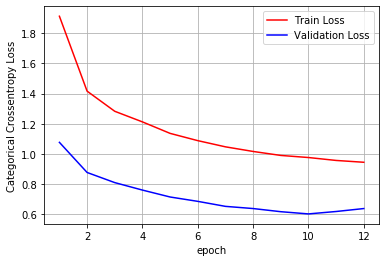

CPU times: user 5min 20s, sys: 21.6 s, total: 5min 42s
Wall time: 3min 33s


In [0]:
%%time
model = Sequential()
model.add(Conv2D(1, kernel_size=(2, 2), activation='relu', 
                 input_shape=input_shape, padding='same', 
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(7, (2, 2), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Error plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#**Model -II with 3 - Convnet layers**

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 55s 923us/step - loss: 1.3213 - acc: 0.5683 - val_loss: 0.3741 - val_acc: 0.9137
Epoch 2/12
60000/60000 [==============================] - 53s 882us/step - loss: 0.5147 - acc: 0.8425 - val_loss: 0.1402 - val_acc: 0.9607
Epoch 3/12
60000/60000 [==============================] - 53s 881us/step - loss: 0.3393 - acc: 0.8978 - val_loss: 0.0842 - val_acc: 0.9752
Epoch 4/12
60000/60000 [==============================] - 53s 879us/step - loss: 0.2666 - acc: 0.9209 - val_loss: 0.0654 - val_acc: 0.9800
Epoch 5/12
60000/60000 [==============================] - 53s 880us/step - loss: 0.2294 - acc: 0.9323 - val_loss: 0.0546 - val_acc: 0.9833
Epoch 6/12
60000/60000 [==============================] - 52s 871us/step - loss: 0.2034 - acc: 0.9407 - val_loss: 0.0501 - val_acc: 0.9839
Epoch 7/12
60000/60000 [==============================] - 53s 878us/step - loss: 0.1856 - acc: 0.9458 - val_loss: 0.

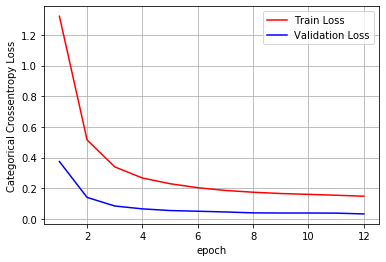

CPU times: user 18min 28s, sys: 59.9 s, total: 19min 28s
Wall time: 10min 41s


In [0]:
%%time
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape, padding='same', 
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Error plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 172s 3ms/step - loss: 1.0956 - acc: 0.6502 - val_loss: 0.1769 - val_acc: 0.9527
Epoch 2/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.3578 - acc: 0.8956 - val_loss: 0.0791 - val_acc: 0.9759
Epoch 3/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.2398 - acc: 0.9299 - val_loss: 0.0552 - val_acc: 0.9822
Epoch 4/12
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1975 - acc: 0.9431 - val_loss: 0.0444 - val_acc: 0.9859
Epoch 5/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.1687 - acc: 0.9511 - val_loss: 0.0388 - val_acc: 0.9864
Epoch 6/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.1493 - acc: 0.9567 - val_loss: 0.0372 - val_acc: 0.9870
Epoch 7/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.1361 - acc: 0.9612 - val_loss: 0.0339 - 

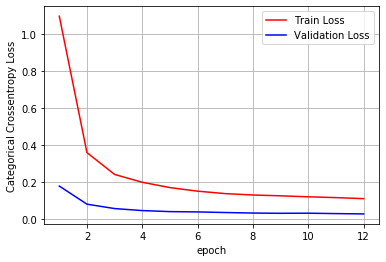

CPU times: user 1h 3min 26s, sys: 1min 33s, total: 1h 4min 59s
Wall time: 34min 12s


In [0]:
%%time
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape, padding='same', 
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Error plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 172s 3ms/step - loss: 2.4369 - acc: 0.6701 - val_loss: 0.7775 - val_acc: 0.9349
Epoch 2/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.5907 - acc: 0.9201 - val_loss: 0.3096 - val_acc: 0.9803
Epoch 3/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.4379 - acc: 0.9408 - val_loss: 0.2606 - val_acc: 0.9849
Epoch 4/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.3853 - acc: 0.9491 - val_loss: 0.2357 - val_acc: 0.9864
Epoch 5/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.3562 - acc: 0.9537 - val_loss: 0.2255 - val_acc: 0.9835
Epoch 6/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.3340 - acc: 0.9567 - val_loss: 0.2045 - val_acc: 0.9871
Epoch 7/12
60000/60000 [==============================] - 168s 3ms/step - loss: 0.3210 - acc: 0.9572 - val_loss: 0.1992 - 

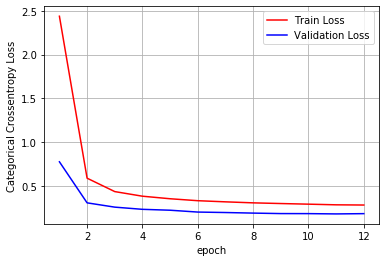

CPU times: user 1h 2min 51s, sys: 1min 34s, total: 1h 4min 25s
Wall time: 33min 55s


In [0]:
%%time
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape, padding='same', 
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Error plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#**Model - III with 5 - Convnet layers**

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 57s 947us/step - loss: 2.2582 - acc: 0.2415 - val_loss: 2.0836 - val_acc: 0.2941
Epoch 2/12
60000/60000 [==============================] - 52s 873us/step - loss: 1.4995 - acc: 0.4536 - val_loss: 1.4567 - val_acc: 0.4895
Epoch 3/12
60000/60000 [==============================] - 53s 885us/step - loss: 1.2549 - acc: 0.5537 - val_loss: 1.4632 - val_acc: 0.4759
Epoch 4/12
60000/60000 [==============================] - 53s 886us/step - loss: 1.1002 - acc: 0.6265 - val_loss: 1.4953 - val_acc: 0.4831
Epoch 5/12
60000/60000 [==============================] - 53s 884us/step - loss: 0.9788 - acc: 0.6817 - val_loss: 1.2909 - val_acc: 0.5163
Epoch 6/12
60000/60000 [==============================] - 53s 881us/step - loss: 0.8790 - acc: 0.7172 - val_loss: 1.0550 - val_acc: 0.6089
Epoch 7/12
60000/60000 [==============================] - 53s 887us/step - loss: 0.8037 - acc: 0.7490 - val_loss: 1.

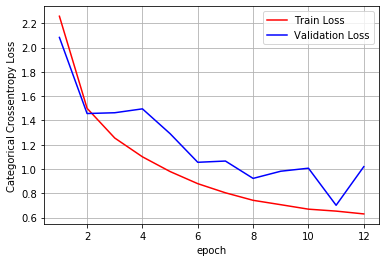

CPU times: user 18min 52s, sys: 38.1 s, total: 19min 30s
Wall time: 10min 47s


In [0]:
%%time
model = Sequential()
model.add(Conv2D(2, kernel_size=(5, 5), activation='relu', 
                 input_shape=input_shape, padding='same', 
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(4, (5, 5), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(8, (5, 5), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(16, (5, 5), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(32, (5, 5), activation='relu', 
                 padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Error plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

*Observation:*
This model is doing good with a relatively low loss and high accuracy and is not overfitting very much.

**Summary**

In [2]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["S.No","No.of Layers(Conv2D)", "Activation", "Kernel Size", "No of Channels", "Dropout","BatchNormalization", "Max Pooling (2x2)", "L2-Regularizers", "Test loss","Test accuracy"]
pt.add_row(["1","3", "relu", "3X3", "(16,32,64)", "(0.25,0.5,0.4,0.5)","Applied", "Applied", "Not Applied", "0.033","0.989"])
pt.add_row(["2","3", "relu", "3X3", "(64,64,64)", "(0.5,0.5,0.5,0.5)","Applied", "Applied", "Not Applied", "0.026","0.990"])
pt.add_row(["3","3", "relu", "3X3", "(64,64,64)", "(0.5,0.5,0.5,0.5)","Applied", "Applied", "Applied", "0.186","0.981"])
pt.add_row(["4","2", "relu", "2X2", "(1,7)", "(0.25,0.4,0.5)","Applied", "Applied", "Not Applied", "0.720","0.794"])
pt.add_row(["5","2", "relu", "2X2", "(1,7)", "(0.25,0.4,0.5)","Applied", "Applied", "Applied", "0.639","0.843"])
pt.add_row(["6","2", "relu", "2X2", "(1,7)", "(0.25,0.4,0.5)","Applied", "Applied", "Applied", "1.116","0.666"])
pt.add_row(["7","5", "relu", "5X5", "(2,4,8,16,32)", "(0.5,0.5,0.5,0.4,0.5)","Applied", "Applied", "Not Applied", "1.019","0.696"])
print(pt)

+------+----------------------+------------+-------------+----------------+-----------------------+--------------------+-------------------+-----------------+-----------+---------------+
| S.No | No.of Layers(Conv2D) | Activation | Kernel Size | No of Channels |        Dropout        | BatchNormalization | Max Pooling (2x2) | L2-Regularizers | Test loss | Test accuracy |
+------+----------------------+------------+-------------+----------------+-----------------------+--------------------+-------------------+-----------------+-----------+---------------+
|  1   |          3           |    relu    |     3X3     |   (16,32,64)   |   (0.25,0.5,0.4,0.5)  |      Applied       |      Applied      |   Not Applied   |   0.033   |     0.989     |
|  2   |          3           |    relu    |     3X3     |   (64,64,64)   |   (0.5,0.5,0.5,0.5)   |      Applied       |      Applied      |   Not Applied   |   0.026   |     0.990     |
|  3   |          3           |    relu    |     3X3     |   (64,

**Conclusion:**
1. From the above table the model with 3 Convolution layers and 3x3x64 Kernel filters work very well with the Test loss of 0.026 and test accuracy 0.990.
2. After appling the L2 regularizer though it increased the test loss slightly and reduced the test accuracy a bit, it made the model to avoid overfit for some extent.
3. Techiques like Dropout, Maxpooling and Batch normalization plays a vital role in the model performance.
4. It is better to have the kernal dimension in odd numbers.
5. Since the image dimension is small, a kernal size of 5x5 is sufficient. But when the image dimension gets higher we can even use kernals with dimension upto 7x7 or more.
